*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

# Load libraries

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Load dataset

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()
# dataset.head()

--2022-08-31 17:23:26--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-08-31 17:23:26 (70.2 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Split dataset

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(dataset.loc[:, 'age':'region'],
 dataset['expenses'],
 test_size=0.2,
 random_state=25)

# Ordinal encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Get list of categorical variables
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'smoker', 'region']


In [ ]:
# Make copy to avoid changing original data 
train_dataset = train_data.copy()
test_dataset = test_data.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
train_dataset[object_cols] = ordinal_encoder.fit_transform(train_dataset[object_cols])
test_dataset[object_cols] = ordinal_encoder.transform(test_dataset[object_cols])

# 1.Neural networks

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    keras.layers.Dense(128, kernel_initializer='normal',input_dim = train_dataset.shape[1], activation='relu'), 
    keras.layers.Dense(256, kernel_initializer='normal',activation='relu'), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer='normal',activation='relu'), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer='normal',activation='relu'), 
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, kernel_initializer='normal',activation='linear')
])

model.compile(optimizer="Adam", loss="mae", metrics=['mae', 'mse'])


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Early stopping
es = EarlyStopping(monitor='mae', mode='min', patience=50, verbose=1)

# Checkpoints
checkpoint_filepath = '/checkpoint'
mc = ModelCheckpoint(filepath=checkpoint_filepath, monitor='mae', mode='min', save_best_only=True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 128)               896       
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
history = model.fit(train_dataset, train_labels, epochs=500, batch_size=32, validation_split = 0.2, shuffle=True, callbacks=[es, mc])

Epoch 1/500
27/27 [==============================] - 2s 64ms/step - loss: 13082.5889 - mae: 13082.5889 - mse: 315616352.0000 - val_loss: 14189.4990 - val_mae: 14189.4990 - val_mse: 361695104.0000
Epoch 2/500
27/27 [==============================] - 2s 59ms/step - loss: 12254.8096 - mae: 12254.8096 - mse: 294724992.0000 - val_loss: 11445.5117 - val_mae: 11445.5117 - val_mse: 284479328.0000
Epoch 3/500
27/27 [==============================] - 2s 75ms/step - loss: 7993.3560 - mae: 7993.3560 - mse: 156928960.0000 - val_loss: 6893.9248 - val_mae: 6893.9248 - val_mse: 126938952.0000
Epoch 4/500
27/27 [==============================] - 2s 87ms/step - loss: 5183.4453 - mae: 5183.4453 - mse: 86766512.0000 - val_loss: 4734.9497 - val_mae: 4734.9497 - val_mse: 74090920.0000
Epoch 5/500
27/27 [==============================] - 3s 102ms/step - loss: 3959.5842 - mae: 3959.5842 - mse: 54163196.0000 - val_loss: 4204.2910 - val_mae: 4204.2910 - val_mse: 50461208.0000
Epoch 6/500
27/27 [================

In [ ]:
from keras.models import load_model
model = load_model(checkpoint_filepath)

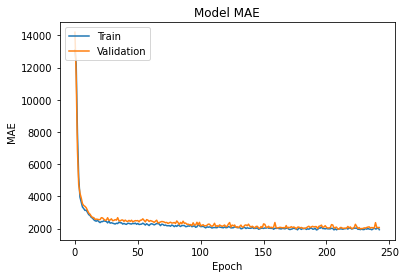

In [ ]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.title('Model MAE')
plt.legend(loc='upper left')

9/9 - 0s - loss: 1332.1807 - mae: 1332.1807 - mse: 14687308.0000 - 136ms/epoch - 15ms/step
Testing set Mean Abs Error: 1332.18 expenses
You passed the challenge. Great job!


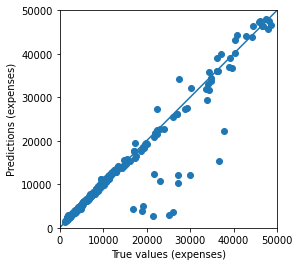

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

# 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(random_state = 42)
rf.fit(train_dataset, train_labels)

# Get the mean absolute error on the validation data
predicted = rf.predict(test_dataset)
MAE = mean_absolute_error(test_labels , predicted)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  2408.0099897121536


## Random forest with gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_dataset, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200)
rfModel.fit(train_dataset, train_labels)

# Get the mean absolute error on the validation data
predicted = rfModel.predict(test_dataset)
MAE = mean_absolute_error(test_labels , predicted)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  2184.69944255789


# 3. XGB Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

XGBModel = XGBRegressor(objective ='reg:squarederror')
XGBModel.fit(train_dataset, train_labels , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(test_dataset)
MAE = mean_absolute_error(test_labels , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  2119.321808662984


## XGB Regressor with gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03], #so called `eta` value
              'max_depth': [3, 6, 12],
              'min_child_weight': [1, 5, 15],
              'silent': [1],
              'subsample': [0.7, 1],
              'colsample_bytree': [0, 1],
              'n_estimators': [100, 200, 500]}

xgb_grid = GridSearchCV(xgb1, parameters, cv = 2, n_jobs = 1, verbose=True)

xgb_grid.fit(train_dataset, train_labels)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
0.8444212300802867
{'colsample_bytree': 1, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 15, 'n_estimators': 200, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 1}


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

XGBModel = XGBRegressor(colsample_bytree= 1, learning_rate= 0.03, max_depth= 3, min_child_weight= 15, n_estimators= 200, objective ='reg:squarederror' , silent= 1, subsample= 1)
XGBModel.fit(train_dataset, train_labels, verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(test_dataset)
MAE = mean_absolute_error(test_labels , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  2117.4728361488455


# 4. Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rgr = LinearRegression()
rgr.fit(train_dataset, train_labels)

rgr_predictions = rgr.predict(test_dataset)

# Get the mean absolute error on the validation data :
MAE = mean_absolute_error(test_labels , rgr_predictions)
print('Linear regression validation MAE = ', MAE)

# Get the mean squared error on the validation data :
MSE = mean_squared_error(test_labels , rgr_predictions)
print('Linear regression validation MSE = ', MSE)

Linear regression validation MAE =  4250.204821965914
Linear regression validation MSE =  34223962.67500753
